Dataset Shape: (51625, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51625 entries, 0 to 51624
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         51625 non-null  object 
 1   Order ID                     51625 non-null  object 
 2   Customer ID                  51625 non-null  int64  
 3   Product ID                   51625 non-null  int64  
 4   Product Name                 51625 non-null  object 
 5   Product Category             51625 non-null  object 
 6   Units (Placed Orders)        51625 non-null  int64  
 7   Price Per Unit (MYR)         51625 non-null  float64
 8   Sales (Placed Orders) (MYR)  51625 non-null  float64
 9   Payment Method               51625 non-null  object 
 10  Discounts Applied (MYR)      51625 non-null  float64
 11  Shipping Costs (MYR)         51625 non-null  float64
 12  Order Status                 51625 non-null  ob

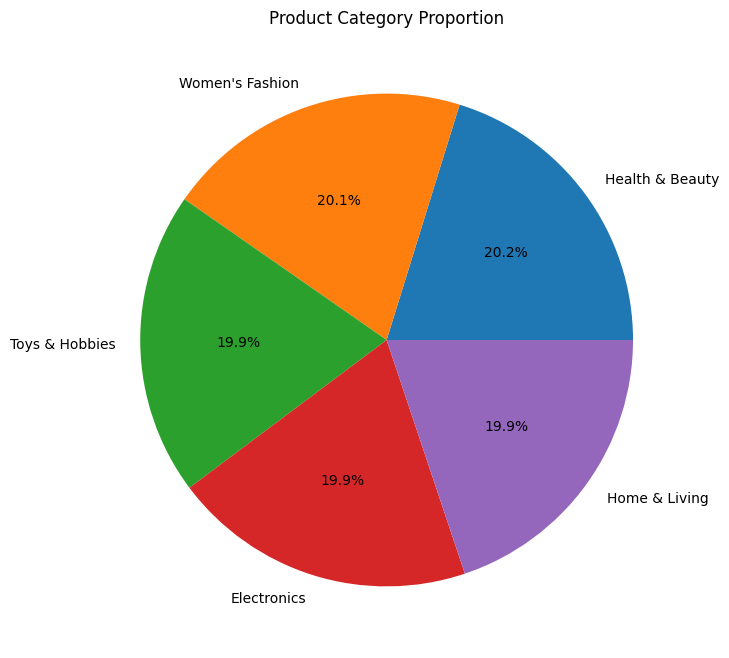

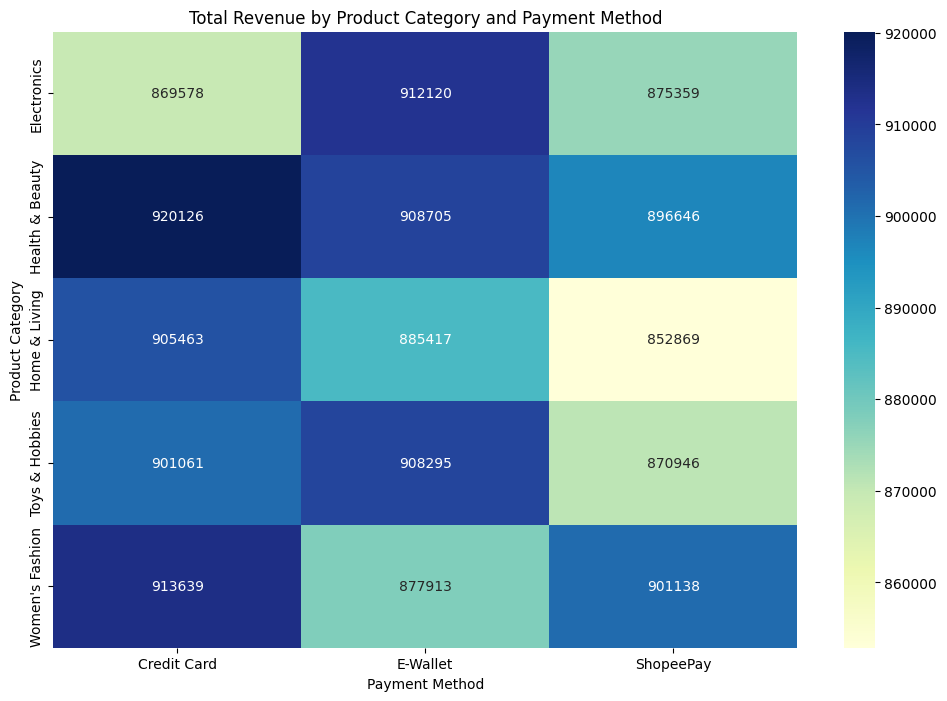

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
data = pd.read_csv('sales_report_real_time.csv')

# Step 3: Basic Data Inspection
print("Dataset Shape:", data.shape)
print("\nColumn Info:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

# Step 4: Check for duplicates and remove them if any
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)

# Step 5: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Step 6: Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)

# Step 7: Statistical Summary
print("\nStatistical Summary:\n", data.describe())

# Step 8: Drop unnecessary columns after initial inspection
data.drop(['Customer ID', 'Product ID'], axis=1, inplace=True)

# Step 9: Univariate Analysis - Pie Chart for Product Category
# A pie chart visualizes the proportion of each product category, providing insights into the overall category distribution.
plt.figure(figsize=(8, 8))
data['Product Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Product Category Proportion")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

# Step 10: Multivariate Analysis - Heatmap of Revenue by Product Category and Payment Method
# A heatmap displaying total revenue for each combination of product category and payment method.
revenue_pivot = data.pivot_table(values='Revenue (MYR)', index='Product Category', columns='Payment Method', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Total Revenue by Product Category and Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Product Category")
plt.show()